# Los Grupos cristalográficos.

Cargamos los módulos necesarios para la creación de nuestras funciones.

In [1]:
from PIL import Image

In [2]:
from sympy import *

In [3]:
from numpy import *

In [4]:
from math import *

Cargamos una imagen

In [5]:
imagen = Image.open('salamanquesa.jpeg')

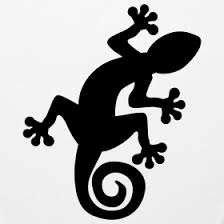

In [6]:
imagen

La primera función que creamos "mini" transforma la imagen en una miniatura para poder trabajarla en mosaicos.
Ajustamos los pixeles de la foto a 120x120.

In [7]:
def mini(imag):
    imagaux=imag
    miniatura = (120, 120)
    imagaux.thumbnail(miniatura)
    return(imagaux)

In [8]:
au=mini(imagen)

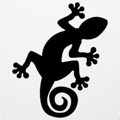

In [9]:
au

Creamos funciones para ver como actuan los principales grupos ornamentales. Simetrias horizontales, verticales, con deslizamiento y rotaciones. $\mathbb Z$

In [10]:
def SimVertical(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[imag.size[0]+i,j]=mpaux[imag.size[0]-i-1,j]
    return(imagaux)

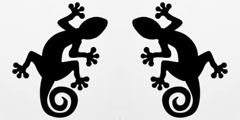

In [11]:
SimVertical(au)

In [12]:
def SimHorizontal(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0],imag.size[1]*2),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,imag.size[1]+j]=mpaux[i,imag.size[1]-j-1]
    return(imagaux)

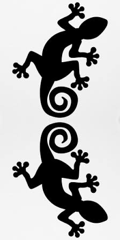

In [13]:
SimHorizontal(au)

In [14]:
def SimHoDesliz(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    mpaux=imagaux.load()
    imsim=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpsim=imsim.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsim[i,j]=mp[i,imag.size[1]-j-1]
    imagaux.paste(imag, (0,0))
    imagaux.paste(imag, (0,imag.size[1]))
    imagaux.paste(imsim, (imag.size[0],0))
    imagaux.paste(imsim, (imag.size[0],imag.size[1]))
    return(imagaux)

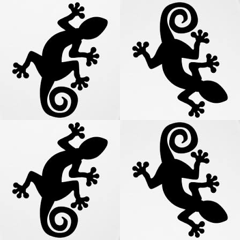

In [15]:
SimHoDesliz(au)

In [16]:
def SimVeDesliz(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    mpaux=imagaux.load()
    imsim=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpsim=imsim.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsim[i,j]=mp[imag.size[0]-i-1,j]
    imagaux.paste(imag, (0,0))
    imagaux.paste(imsim, (0,imag.size[1]))
    imagaux.paste(imag, (imag.size[0],0))
    imagaux.paste(imsim, (imag.size[0],imag.size[1]))
    return(imagaux)

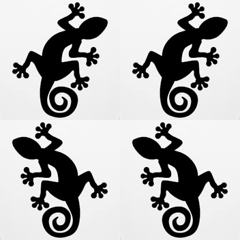

In [17]:
SimVeDesliz(au)

Para las rotaciones usaremos la función rotate predefinida en el modulo PIL.

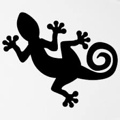

In [18]:
au.rotate(90)

Creamos ahora funciones que den como salida la imagen simetrizada:

In [19]:
def SimV(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[imag.size[0]-i-1,j]
    
    return(imagaux)

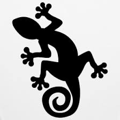

In [20]:
SimV(au)

In [21]:
def SimH(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,imag.size[1]-j-1]
    return(imagaux)

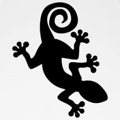

In [22]:
SimH(au)

Una vez tenemos los Grupos ornamentales, procedemos a crear funciones que como entrada tienen el rango y la imagen y como salida de el grupo actuando sobre la imagen 

Antes de cada funcion cargaremos una imagen esquematica, con el fin de entender mejor el comportamiento del mosaico, de como se comporta la región fundamental. Donde existen traslaciones, simetrias y rotaciones.

# P1

In [23]:
ip1 = Image.open('p1.jpg')

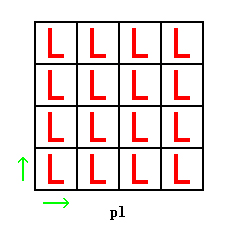

In [24]:
ip1

In [25]:
def p1(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang,imag.size[1]*rang),"white")
    for i in range(0,rang):
        for j in range(0,rang):
            im1.paste(imag, (i*imag.size[0],j*imag.size[1]))
    return(im1)

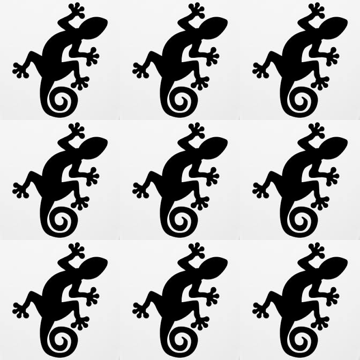

In [26]:
p1(au,3)

# P2

In [27]:
ip2 = Image.open('p2.jpg')

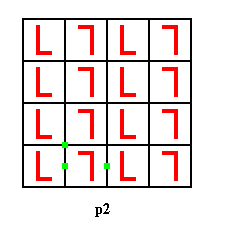

In [28]:
ip2

In [29]:
def p2(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang*2,imag.size[1]*rang*2),"white")
    im2=Image.new("RGB",(imag.size[0],imag.size[1]*2),"white")
    rot = imag.rotate(180)#, expand=1)
    im2.paste(imag, (0,0))
    im2.paste(rot, (0,imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang):
            im1.paste(im2, (i*imag.size[0],j*2*imag.size[1]))
    return(im1)
    

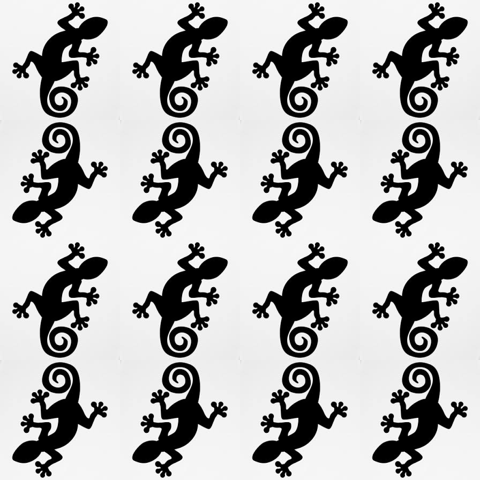

In [30]:
p2(au,2)

# Pm

In [31]:
ipm = Image.open('pm.jpg')

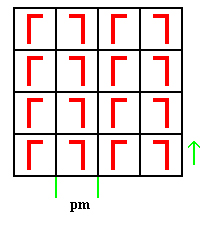

In [32]:
ipm

In [33]:
def pm(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang*2,imag.size[1]*rang*2),"white")
    im2=SimVertical(imag)
    for i in range(0,rang):
        for j in range(0,rang*2):
            im1.paste(im2, (i*2*imag.size[0],j*imag.size[1]))
    return(im1)
    

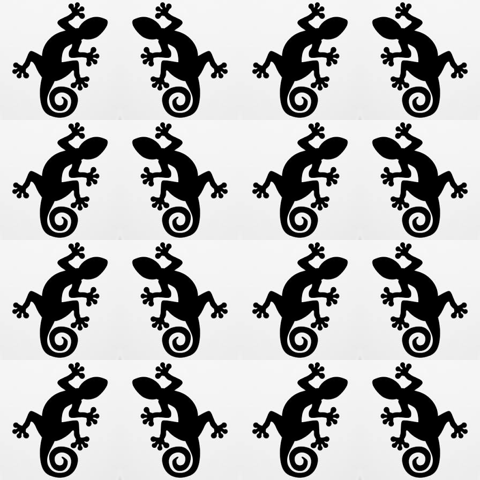

In [34]:
pm(au,2)

# Pg

In [35]:
ipg = Image.open('pg.jpg')

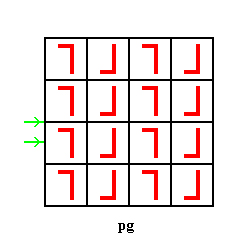

In [36]:
ipg

In [37]:
def pg(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang*2,imag.size[1]*rang*2),"white")
    im2=SimHoDesliz(imag)
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(im2, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)

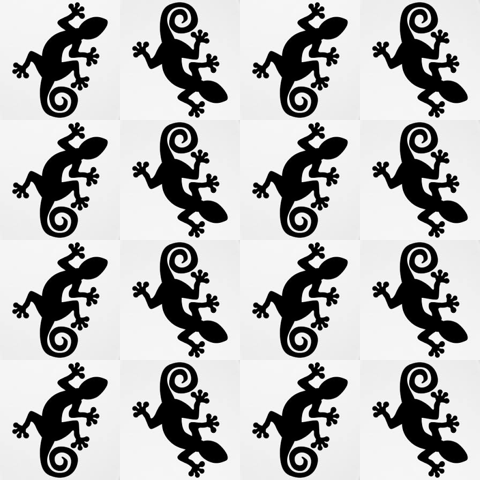

In [38]:
pg(au,2)

# Pmm

In [39]:
ipmm = Image.open('pmm.jpg')

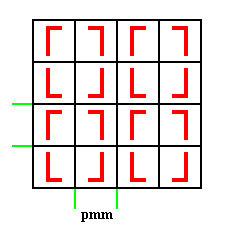

In [40]:
ipmm

In [41]:
def pmm(imag,rang):
    a3=imag
    for i in range(rang):
        a1=SimVertical(a3)
        a2=SimHorizontal(a1)
        a3=a2

        i=i+1
    return(a3)

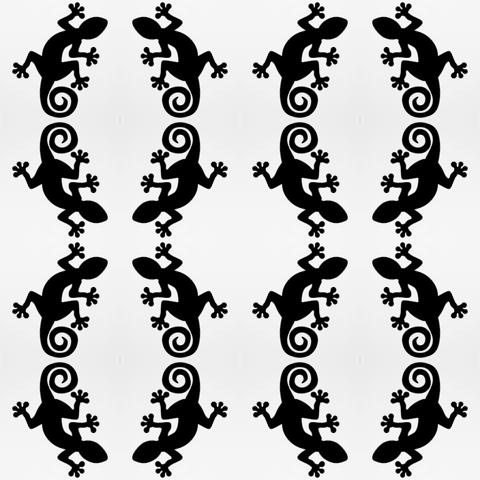

In [42]:
pmm(au,2)

# Cm

In [43]:
icm = Image.open('cm.jpg')

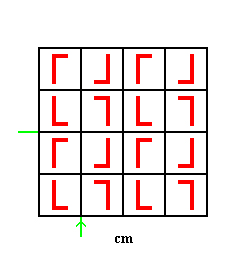

In [44]:
icm

In [45]:
def cm(imag,rang):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    im1=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white")
    mpaux=imagaux.load()
    imsim=SimV(imag)
    imsimH=SimH(imag)
    rot = imag.rotate(180)
    imagaux.paste(imag, (0,0))
    imagaux.paste(imsimH, (0,imag.size[1]))
    imagaux.paste(rot, (imag.size[0],0))
    imagaux.paste(imsim, (imag.size[0],imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(imagaux, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)
    return(imagaux)

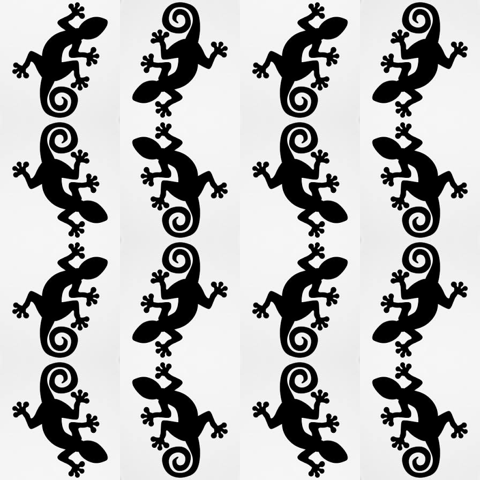

In [46]:
cm(au,2)

# Pgg

In [47]:
ipgg = Image.open('pgg.jpg')

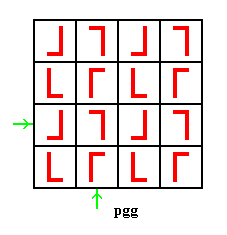

In [48]:
ipgg

In [49]:
def pgg(imag,rang):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    im1=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white")
    mpaux=imagaux.load()
    imsim=SimV(imag)
    imsimH=SimH(imag)
    rot = imag.rotate(180)
    imagaux.paste(imag, (0,0))
    imagaux.paste(imsim, (0,imag.size[1]))
    imagaux.paste(imsimH, (imag.size[0],0))
    imagaux.paste(rot, (imag.size[0],imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(imagaux, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)

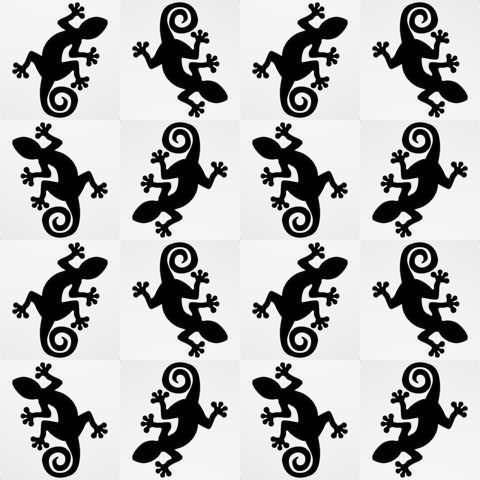

In [50]:
pgg(au,2)

# Pmg

In [51]:
ipmg = Image.open('pmg.jpg')

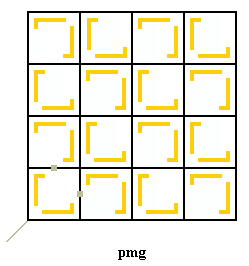

In [52]:
ipmg

In [53]:
def pmg(imag,rang):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    im1=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white")
    mpaux=imagaux.load()
    imsim=SimV(imag)
    imsimH=SimH(imag)
    rot = imag.rotate(180)
    imagaux.paste(imag, (0,0))
    imagaux.paste(imsimH, (0,imag.size[1]))
    imagaux.paste(rot, (imag.size[0],0))
    imagaux.paste(imsim, (imag.size[0],imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(imagaux, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)

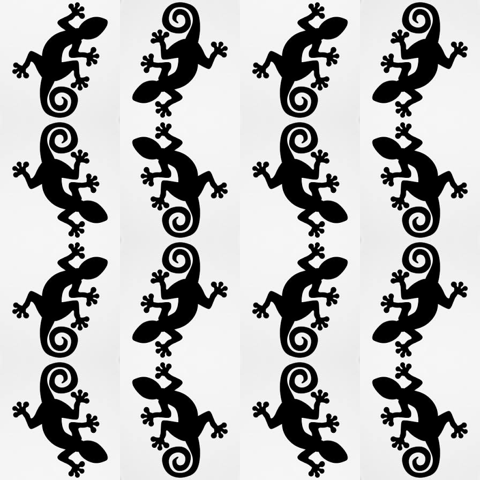

In [54]:
pmg(au,2)

# P4

In [55]:
ip4 = Image.open('p4.jpg')

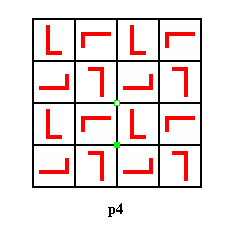

In [56]:
ip4

In [57]:
def p4(imag,rang):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    im1=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white")
    mpaux=imagaux.load()
    rot1 = imag.rotate(270)
    rot2 = imag.rotate(180)
    rot3 = rot1.rotate(180)
    imagaux.paste(imag, (0,0))
    imagaux.paste(rot3, (0,imag.size[1]))
    imagaux.paste(rot1, (imag.size[0],0))
    imagaux.paste(rot2, (imag.size[0],imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(imagaux, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)



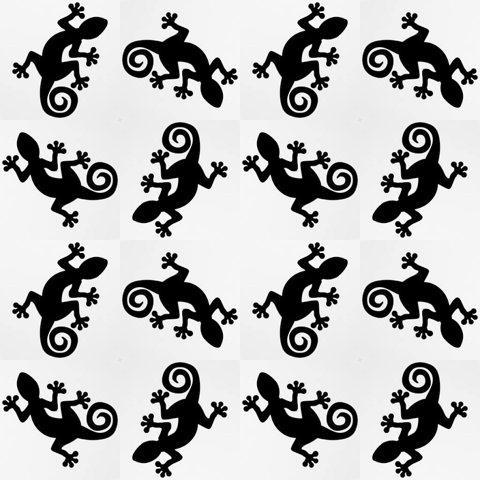

In [58]:
p4(au,2)

# Cmm

In [59]:
icmm = Image.open('cmm.jpg')

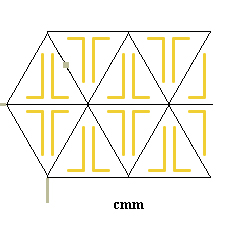

In [60]:
icmm

Para generar el siguiente grupo, puesto que la región fundamental es un triangulo, debemos transformar nuestra imagen en un triangulo. Por tanto creamos la función triangulo.

In [61]:
def triangulo(imag):
    mp=imag.load()
    imagaux=Image.new("RGBA",(imag.size[0],imag.size[1]),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            if j>=(-2*imag.size[1]/imag.size[0])*i+imag.size[1] and j>=(2*imag.size[1]/imag.size[0])*i-imag.size[1]:
                mpaux[i,j]=mp[i,j]
            else:
                mpaux[i,j]=(255,255,255,0)
    return(imagaux)

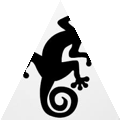

In [62]:
triangulo(au)

In [63]:
def cmm(imag,rang):
    mp=imag.load()
    imagaux=triangulo(imag)
    mpaux=imagaux.load()
    im1=Image.new("RGBA",(imag.size[0]*2,imag.size[1]*2),"white")
    fin=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white") 
    mpf=fin.load()
    mpim1=im1.load()
    imsim=Image.new("RGBA",(imag.size[0],imag.size[1]),"white")
    mpsim=imsim.load()
    s=Image.new("RGBA",(imag.size[0],imag.size[1]),"white")
    mps=s.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsim[i,j]=mpaux[i,imag.size[1]-j-1]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mps[i,j]=mpsim[i,imag.size[1]-j-1]
    im1.paste(imagaux, (0,0))
    im1.paste(imsim, (floor(imag.size[0]/2),0), imsim)
    im1.paste(imsim, (0,imag.size[1]))
    im1.paste(s, (floor(imag.size[0]/2),imag.size[1]),s)
    for i in range(-1,rang*2):
        for j in range(0,rang*2):
            fin.paste(im1, (i*imag.size[0],j*2*imag.size[1]),im1)
    return(fin)
  

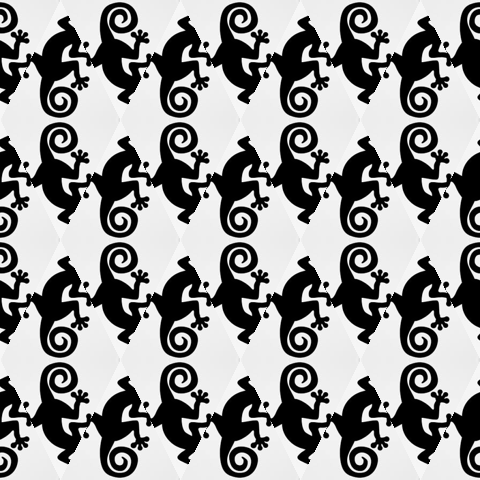

In [64]:
cmm(au,2)

# P4m

In [65]:
ip4m = Image.open('p4m.jpg')

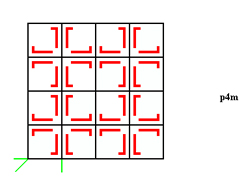

In [66]:
ip4m

Para aplicar este grupo sobre una imagen, tenemos que adaptar la imagen a la región fundamental que es la siguiente:

In [67]:
def divi1(imag):
    mp=imag.load()
    imagaux=Image.new("RGBA",(imag.size[0],imag.size[1]),"white")
    mpaux=imagaux.load()
    rot=imag.rotate(90)
    srot=SimV(imag)
    rot2=srot.rotate(90)
    mprot2=rot2.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            if j>=(imag.size[1]/imag.size[0])*i:
                mpaux[i,j]=mp[i,j]
            else:
                mpaux[i,j]=mprot2[i,j]
    return(imagaux)

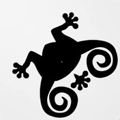

In [68]:
divi1(au)

In [69]:
def p4mm(imag,rang):
    aux=divi1(imag)
    im1=p4(aux,rang)
    return(im1)




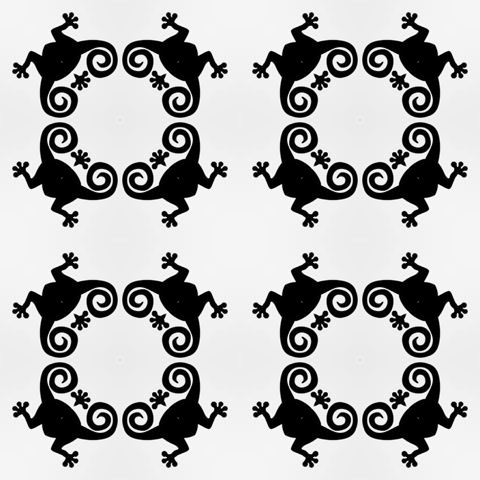

In [70]:
p4mm(au,2)

# P4g

In [71]:
ip4g = Image.open('p4g.jpg')

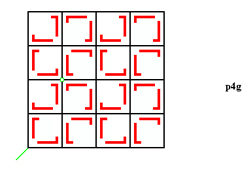

In [72]:
ip4g

Adaptamos a la región fundamental.

In [73]:
def divi2(imag):
    mp=imag.load()
    imagaux=Image.new("RGBA",(imag.size[0],imag.size[1]),"white")
    mpaux=imagaux.load()
    rot=imag.rotate(-90)
    srot=SimV(imag)
    rot2=srot.rotate(-90)
    mprot2=rot2.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            if j>=(-imag.size[1]/imag.size[0])*i+imag.size[1]:
                mpaux[i,j]=mp[i,j]
            else:
                #mpaux[i,j]=(255,255,255,0)
                mpaux[i,j]=mprot2[i,j]
    return(imagaux)

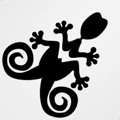

In [74]:
divi2(au)

In [75]:
def p4g(imag,rang):
    aux=divi2(imag)
    im1=p4(aux,rang)
    return(im1)

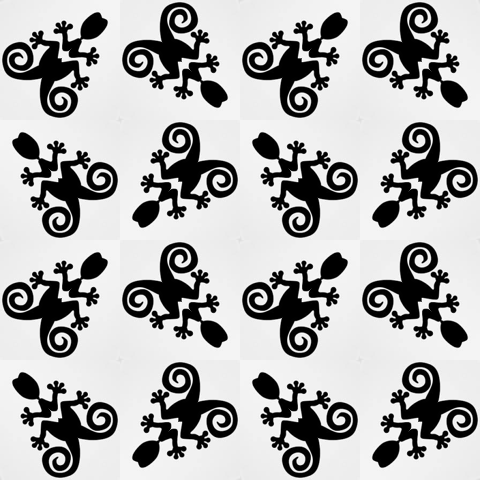

In [76]:
p4g(au,2)

# P3

In [77]:
ip3 = Image.open('p3.jpg')

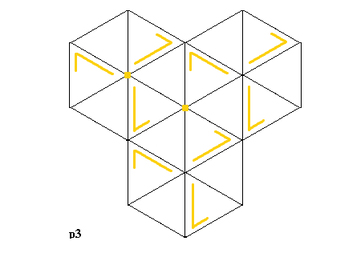

In [78]:
ip3

Para los siguientes grupos necesitamos que la región fundamental sea un triangulo equilatero, por tanto definimos una función que nos transforme la imagen en un triangulo equilatero.

In [79]:
def equilatero(imag):
    caja = (0, imag.size[1]-floor(math.sqrt(imag.size[1]**2-(imag.size[1]/2)**2)), imag.size[0], imag.size[1])
    modif = imag.crop(caja)
    tmod=triangulo(modif)
    return(tmod)

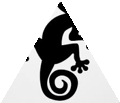

In [80]:
equilatero(au)

In [81]:
def p3(imag,rang):
    mp=imag.load()
    imagaux=equilatero(imag)
    mpaux=imagaux.load()
    im1=Image.new("RGBA",(imagaux.size[0]*3,imagaux.size[1]*3),"white")
    fin=Image.new("RGB",(imagaux.size[0]*3*rang,imagaux.size[1]*3*rang),"white") 
    mpf=fin.load()
    mpim1=im1.load()
    imsim=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mpsim=imsim.load()
    s=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mps=s.load()
    s2=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mps2=s2.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mpsim[i,j]=mpaux[i,imagaux.size[1]-j-1]
    rc=imsim.rotate(-120, expand=1)
    caja=(rc.size[0]-imagaux.size[0],rc.size[1]-imagaux.size[1],rc.size[0],rc.size[1])
    rc2=rc.crop(caja)
    mprc2=rc2.load()
    rccc=imagaux.rotate(-120, expand=1)
    caja3=(0,0,imagaux.size[0],imagaux.size[1])
    rccc2=rccc.crop(caja3)
    mprccc2=rccc2.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mps[i,j]=mprc2[i,imagaux.size[1]-j-1]
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mps2[i,j]=mprccc2[i,imagaux.size[1]-j-1]
    im1.paste(imagaux, (0,0))
    im1.paste(s, (floor(imagaux.size[0]/2),imagaux.size[1]),s)
    im1.paste(rccc2, (imagaux.size[0]-2,0),rccc2)
    for i in range(-2,rang*2):
        for j in range(-2,rang*2):
            fin.paste(im1, (i*3*imagaux.size[0],j*2*imagaux.size[1]),im1)
    #for i in range(-2,rang*2):
        #for j in range(-2,rang*2):
            #if i%2==0 and j%2==0:
                #fin.paste(im1, (i*imagaux.size[0],j*2*imagaux.size[1]+imagaux.size[1]),im1)
    return(im1)
    

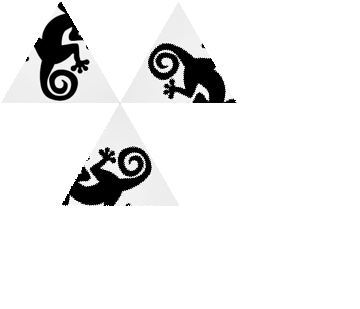

In [82]:
p3(au,2)

# P31m

In [83]:
ip31m = Image.open('p31m.jpg')

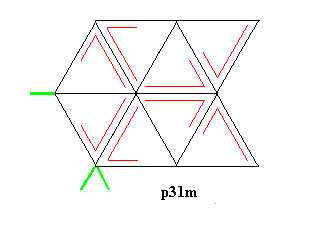

In [84]:
ip31m

In [85]:
def p31m(imag,rang):
    mp=imag.load()
    imagaux=equilatero(imag)
    mpaux=imagaux.load()
    im1=Image.new("RGBA",(imagaux.size[0]*3,imagaux.size[1]*3),"white")
    fin=Image.new("RGB",(imagaux.size[0]*3*rang,imagaux.size[1]*3*rang),"white") 
    mpf=fin.load()
    mpim1=im1.load()
    imsim=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mpsim=imsim.load()
    s=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mps=s.load()
    s2=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mps2=s2.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mpsim[i,j]=mpaux[i,imagaux.size[1]-j-1]
    rc=imsim.rotate(-120, expand=1)
    caja=(rc.size[0]-imagaux.size[0],rc.size[1]-imagaux.size[1],rc.size[0],rc.size[1])
    rc2=rc.crop(caja)
    mprc2=rc2.load()
    rccc=imagaux.rotate(-120, expand=1)
    caja3=(0,0,imagaux.size[0],imagaux.size[1])
    rccc2=rccc.crop(caja3)
    mprccc2=rccc2.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mps[i,j]=mprc2[i,imagaux.size[1]-j-1]
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mps2[i,j]=mprccc2[i,imagaux.size[1]-j-1]
    im1.paste(imagaux, (0,0))
    im1.paste(rc2, (floor(imagaux.size[0]/2),0),rc2)
    im1.paste(imsim, (0,imagaux.size[1]))
    im1.paste(s, (floor(imagaux.size[0]/2),imagaux.size[1]),s)
    im1.paste(rccc2, (imagaux.size[0]-2,0),rccc2)
    im1.paste(s2,(imagaux.size[0]-2,imagaux.size[1]),s2)
    for i in range(-2,rang*2):
        for j in range(-2,rang*2):
            fin.paste(im1, (i*3*imagaux.size[0],j*2*imagaux.size[1]),im1)
    #for i in range(-2,rang*2):
        #for j in range(-2,rang*2):
            #if i%2==0 and j%2==0:
                #fin.paste(im1, (i*imagaux.size[0],j*2*imagaux.size[1]+imagaux.size[1]),im1)
    return(im1)
    

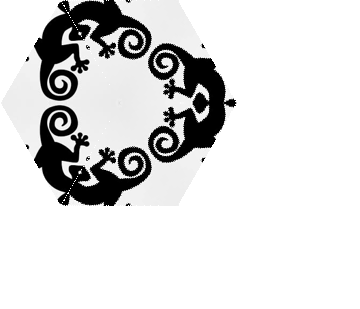

In [86]:
p31m(au,2)

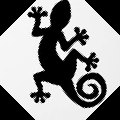

In [87]:
au.rotate(45)

Para generar los este y los siguientes grupos debemos crear una función que nos delimite una nueva región fundamental y una tesela.

In [1131]:
def fundam(imag):
    im=equilatero(imag)
    mp=im.load()
    imaux=Image.new("RGBA",(im.size[0],im.size[1]),"white")
    mpaux=imaux.load()
    for i in range(im.size[0]):
        for j in range(im.size[1]):
            if j<=((-2/3)*im.size[1]/im.size[0])*i+im.size[1] and i<im.size[0]/2:
                mpaux[i,j]=mp[i,j]
            else:
                mpaux[i,j]=(255,255,255,0)
    return(imaux)

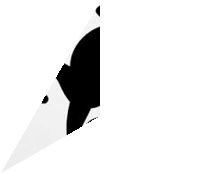

In [1132]:
fundam(au)

In [1133]:
def fundam2(imag):
    pp=fundam(imag)
    pp2=pp.rotate(-120, expand=1)
    pp3=pp.rotate(120, expand=1)
    ppaux=Image.new("RGBA",(pp3.size[0],pp3.size[1]),"white")
    ppaux.paste(pp, (0,0))
    ppaux.paste(pp2, (0,0),pp2)
    ppaux.paste(pp3, (-floor(pp.size[0]/4),-1),pp3)
    aux=equilatero(imag)
    caja=(0,0,aux.size[0],aux.size[1])
    ppaux2=ppaux.crop(caja)
    return(ppaux2)

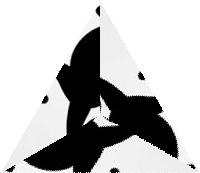

In [1134]:
fundam2(au)

In [1145]:
def p3m1(imag,rang):
    imag=mini(imag)
    mp=imag.load()
    imagaux=fundam2(imag)
    mpaux=imagaux.load()
    im1=Image.new("RGBA",(imagaux.size[0]*3,imagaux.size[1]*3),"white")
    fin=Image.new("RGB",(imagaux.size[0]*3*rang,imagaux.size[1]*3*rang),"white") 
    mpf=fin.load()
    mpim1=im1.load()
    imsim=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mpsim=imsim.load()
    s=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mps=s.load()
    s2=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mps2=s2.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mpsim[i,j]=mpaux[i,imagaux.size[1]-j-1]
    rc=imsim.rotate(-120, expand=1)
    caja=(rc.size[0]-imagaux.size[0],rc.size[1]-imagaux.size[1],rc.size[0],rc.size[1])
    rc2=rc.crop(caja)
    mprc2=rc2.load()
    rccc=imagaux.rotate(-120, expand=1)
    caja3=(0,0,imagaux.size[0],imagaux.size[1])
    rccc2=rccc.crop(caja3)
    mprccc2=rccc2.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mps[i,j]=mprc2[i,imagaux.size[1]-j-1]
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mps2[i,j]=mprccc2[i,imagaux.size[1]-j-1]
    im1.paste(imagaux, (0,0))
    im1.paste(rc2, (floor(imagaux.size[0]/2)-1,0),rc2)
    im1.paste(rc2, (0,imagaux.size[1]),rc2)
    im1.paste(imagaux, (floor(imagaux.size[0]/2),imagaux.size[1]),imagaux)
    im1.paste(imagaux, (imagaux.size[0]-1,0),imagaux)
    im1.paste(rc2,(imagaux.size[0]-1,imagaux.size[1]),rc2)
    for i in range(-2,rang*2):
        for j in range(-2,rang*2):
            fin.paste(im1, (i*3*imagaux.size[0],j*2*imagaux.size[1]),im1)
    #for i in range(-2,rang*2):
        #for j in range(-2,rang*2):
            #if i%2==0 and j%2==0:
                #fin.paste(im1, (i*imagaux.size[0],j*2*imagaux.size[1]+imagaux.size[1]),im1)
    return(im1)
    

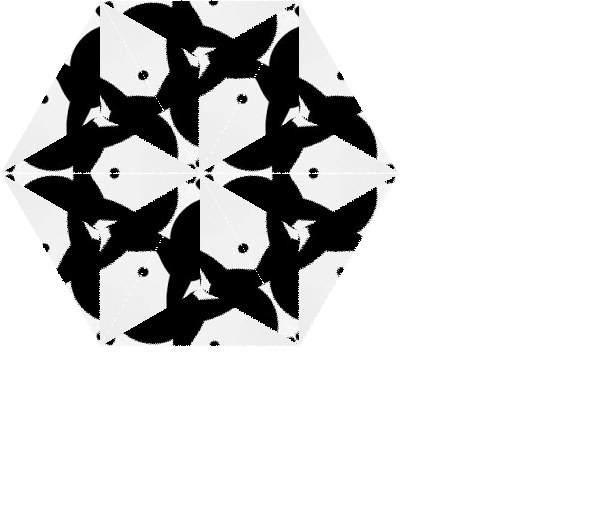

In [1146]:
p3m1(au,2)

In [1147]:
ii = Image.open('bulle2.png')

In [1148]:
ii2=mini(ii)

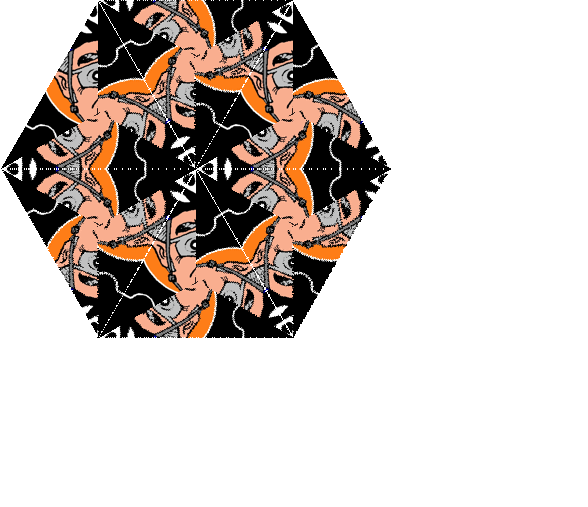

In [1149]:
p3m1(ii,2)

# P6


In [1140]:
ip6 = Image.open('p6.jpg')

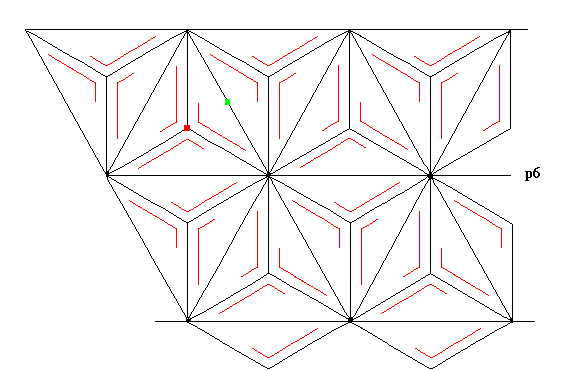

In [1141]:
ip6

In [1150]:
def p6(imag,rang):
    imag=mini(imag)
    mp=imag.load()
    imagaux=fundam2(imag)
    mpaux=imagaux.load()
    im1=Image.new("RGBA",(imagaux.size[0]*3,imagaux.size[1]*3),"white")
    fin=Image.new("RGB",(imagaux.size[0]*3*rang,imagaux.size[1]*3*rang),"white") 
    mpf=fin.load()
    mpim1=im1.load()
    imsim=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mpsim=imsim.load()
    s=Image.new("RGBA",(imagaux.size[0],imagaux.size[1]),"white")
    mps=s.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mpsim[i,j]=mpaux[i,imagaux.size[1]-j-1]
    rc=imsim.rotate(-120, expand=1)
    caja=(rc.size[0]-imagaux.size[0],rc.size[1]-imagaux.size[1],rc.size[0],rc.size[1])
    rc2=rc.crop(caja)
    mprc2=rc2.load()
    for i in range(imagaux.size[0]):
        for j in range(imagaux.size[1]):
            mps[i,j]=mprc2[imagaux.size[0]-i-1,j]
    im1.paste(imagaux, (0,0))
    im1.paste(s, (floor(imagaux.size[0]/2)-1,0),s)
    im1.paste(s, (0,imagaux.size[1]),s)
    im1.paste(imagaux, (floor(imagaux.size[0]/2)-1,imagaux.size[1]),imagaux)
    im1.paste(imagaux, (imagaux.size[0]-2,0),imagaux)
    im1.paste(s,(imagaux.size[0]-2,imagaux.size[1]),s)
    for i in range(-2,rang*2):
        for j in range(-2,rang*2):
            fin.paste(im1, (i*3*imagaux.size[0],j*2*imagaux.size[1]),im1)
    #for i in range(-2,rang*2):
        #for j in range(-2,rang*2):
            #if i%2==0 and j%2==0:
                #fin.paste(im1, (i*imagaux.size[0],j*2*imagaux.size[1]+imagaux.size[1]),im1)
    return(im1)
    

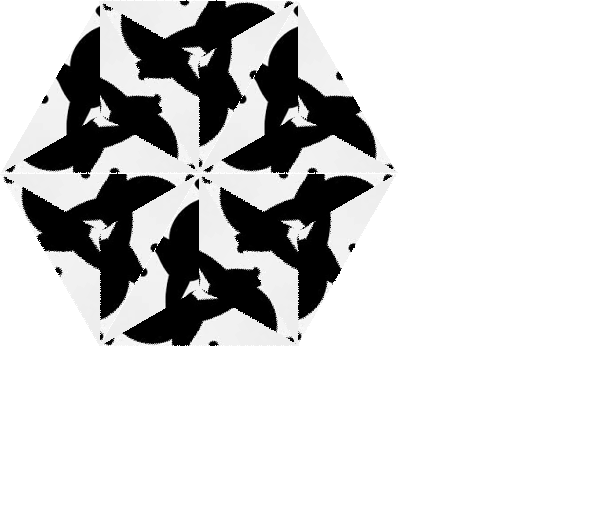

In [1151]:
p6(au,2)

# P6mm

In [1164]:
def fundam3(imag):
    im=equilatero(imag)
    mp=im.load()
    imaux=Image.new("RGBA",(im.size[0],im.size[1]),"white")
    mpaux=imaux.load()
    for i in range(im.size[0]):
        for j in range(im.size[1]):
            if j<=((-2/3)*im.size[1]/im.size[0])*i+im.size[1] and j<=((2/3)*im.size[1]/im.size[0])*i+im.size[1]/3 and i<im.size[0]/2:
                mpaux[i,j]=mp[i,j] 
            else:
                mpaux[i,j]=(255,255,255,0)
    return(imaux)

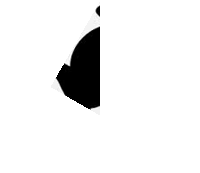

In [1168]:
fundam3(au)

In [1197]:
def fundam4(imag):
    imag=fundam3(imag)
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpaux=imagaux.load()
    a1=SimV(imag)
    a2=SimH(a1)
    a3=SimV(a2)
    a4=a3.rotate(-30, expand=1)
    return(a3)

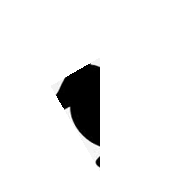

In [1198]:
fundam4(au)

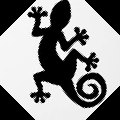

In [87]:
au.rotate(45)